In [41]:
import pandas as pd
import getpass
from functions import connect_mysql, mysql_list

# Input User id
try:
    # password input hashed
    id = getpass.getpass("id: yixin")
except Exception as ex:
    print('Error Occured : ', ex)
#Input password
try:
    # password input hashed
    pwd = getpass.getpass("password: utsmdsi2020 ")
except Exception as ex:
    print('Error Occured : ', ex)

#host for RDS connection
host = "mdsi-dsp-spr-2020.cehiwpryiego.ap-southeast-2.rds.amazonaws.com"
mydb = connect_mysql(host, id, pwd)

if mydb:
    print("Connection Successful")


Connection Successful


In [42]:
from functions import mysql_list
mydb = connect_mysql(host, id, pwd)
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES;")
# create a list of database
db_list = mysql_list(mycursor.fetchall())
print(db_list)
# asx is the database to be used
db = "asx"

['asx', 'information_schema', 'mysql', 'performance_schema']


In [43]:
mydb = connect_mysql(host, id, pwd, db)
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES;")
tb_list = mysql_list(mycursor.fetchall())
print(tb_list)


['GDP_history_year', 'asx200', 'asx200_June_2020', 'asx200_month', 'asx_all', 'asx_history', 'asx_s_and_p', 'australia_GDP_1960_2020_usd', 'cashrate', 'exchange_rate', 'national_net_lending', 'net_lending_borrowing', 'new_loan_commitment_value_properties_purchased', 's_and_p', 'unemployment_rate', 'vix']


In [44]:
##read table from SQL
mydb = connect_mysql(host, id, pwd, db)
trading_data = pd.read_sql_query("SELECT * FROM asx_history where Date > '2020-01-01' ", con=mydb)
asx_info = pd.read_sql_query("SELECT * FROM asx200_June_2020", con=mydb)


##merge two tables
cbind_table = pd.merge(trading_data, asx_info, on="Code")


,Code,Date,Open,High,Low,Close,Adj Close,Volume,Company,Sector,Market Cap,Weight(%)
0,A2M,2020-01-02,14.25,14.330,13.99,14.02,14.02,2249159,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
1,A2M,2020-01-03,14.18,14.300,14.03,14.03,14.03,1656782,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
2,A2M,2020-01-06,14.02,14.170,13.91,14.09,14.09,2181542,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
3,A2M,2020-01-07,14.10,14.220,14.02,14.17,14.17,1435524,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
4,A2M,2020-01-08,14.17,14.205,13.88,14.01,14.01,2568803,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
5,A2M,2020-01-09,14.20,14.400,14.14,14.36,14.36,2527008,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
6,A2M,2020-01-10,14.45,14.495,14.30,14.37,14.37,3209932,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
7,A2M,2020-01-13,14.36,14.370,14.09,14.21,14.21,2347282,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
8,A2M,2020-01-14,14.20,14.220,13.92,14.00,14.00,3291839,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74
9,A2M,2020-01-15,13.92,14.020,13.77,13.98,13.98,4431084,The a2 Milk Company Ltd,Consumer Staples,"12,806,500,000",0.74


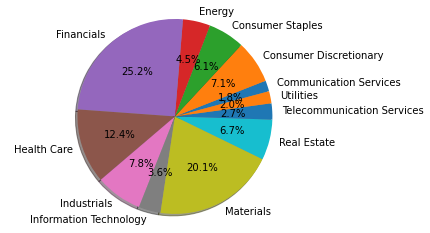

In [61]:
import matplotlib.pyplot as plt
asx_info2 = asx_info.groupby(['Sector']).sum()
print(asx_info2)
labels = ["Communication Services","Consumer Discretionary","Consumer Staples","Energy",
"Financials","Health Care","Industrials","Information Technology","Materials","Real Estate","Telecommunication Services",
          "Utilities"]
sizes = [1.79,7.07,6.02,4.5,25,12.31,7.7,3.61,20.01,6.66,2.66,1.99]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=15)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [72]:
index = pd.read_sql_query("SELECT * FROM ASX200_index ", con=mydb)
import plotly.express as px

df = index
fig = px.line(df, x='Effective date', y="S&P/ASX 200")
fig.show()